# Simultaneous stereo-EEG and high-density scalp EEG recordings to study the effects of intracerebral stimulation parameters
## Dataset usage demonstration

This notebook will provide a usage demonstration of the dataset. It will cover the necessary steps to load the data and explore it.

### Imports
First we will import the necessary modules. In order to install these modules, please refer to the [MNE-Python](https://martinos.org/mne/stable/install_mne_python.html) website and follow the instructions. In addition you will need a module that will allow to import our custom function to load the BIDS data. Please run _pip install ipynb_ on your terminal or command prompt once you have activated the environment. If you find any difficulties please open an issue on this repository.

In [1]:
# note: uncomment the next line for interactive plots
#%matplotlib
import mne
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import plotting
import os.path as op
import matplotlib.pyplot as plt
from ipynb.fs.full.fx_bids import load_bids

/home/eze/soft/anaconda3/envs/mnestable/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


### Definitions
Here we will define the location of the dataset on the hard drive, and the subject and session we want to analyze:

In [2]:
dir_bids = '/home/eze/unimi/hbp/ccepcoreg/gnode/ccepcoreg' # base directory of the BIDS dataset
task = 'ccepcoreg' # task name
subj = 'sub-05' # subject id
run = 'run-03' # rund id

## Load data
We will then load the epochs, SEEG channel locations, events information and MRI:

In [3]:
epo_eeg = load_bids(dir_bids, subj, task, run, kind='eeg') # load eeg epochs
epo_ieeg = load_bids(dir_bids, subj, task, run, kind='ieeg') # load seeg epochs

seeg_ch_info = pd.read_csv(op.join(dir_bids, 'derivatives', 'epochs', subj, 'ieeg', '%s_task-%s_space-T1w_electrodes.tsv' % (subj, task)), sep='\t') # load SEEG channel info
seeg_ch_info_mni = pd.read_csv(op.join(dir_bids, 'derivatives', 'epochs', subj, 'ieeg', '%s_task-%s_space-MNI152NLin2009aSym_electrodes.tsv' % (subj, task)), sep='\t') # load SEEG channel info

events = pd.read_csv(op.join(dir_bids, 'derivatives', 'epochs', subj, 'eeg', '%s_task-%s_%s_epochs.tsv' % (subj, task, run)), sep='\t') # load events (contain the stimulating channel name)
mri = nib.load(op.join(dir_bids, subj, 'anat', '%s_T1w.nii' % subj))

Not setting metadata
Not setting metadata
53 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


## View data
Now, let's see the location of the EEG sensors in 3D. Channels identified as bad will be shown in red. The number of bad channel varies by subject and is mainly caused by the overlap between the positions of the the EEG electrodes and the SEEG electrodes.

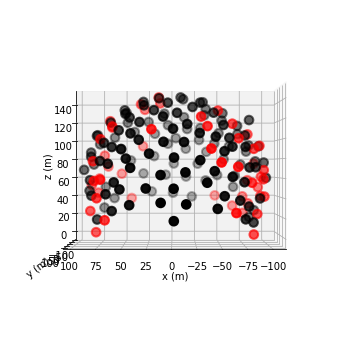

In [4]:
f = epo_eeg.plot_sensors(kind='3d') # sensors' positions

Then we will see the MRI and the location of the SEEG contactas in MNI space

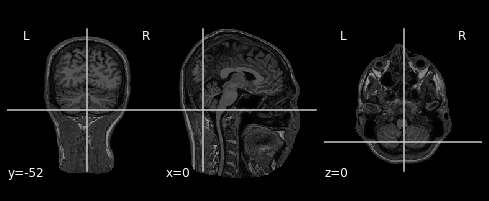

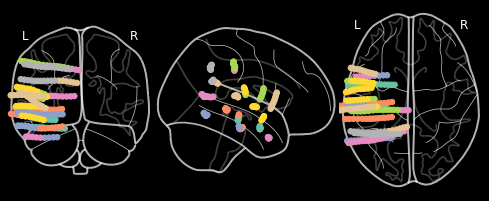

In [5]:
plotting.plot_anat(mri)

adj_mat = np.zeros((len(seeg_ch_info_mni), len(seeg_ch_info_mni)))
plotting.plot_connectome(adj_mat, node_coords=seeg_ch_info_mni[['x', 'y', 'z']].values*1000,
                display_mode='ortho', node_size=30, black_bg=True)


Here we can see the epochs data:

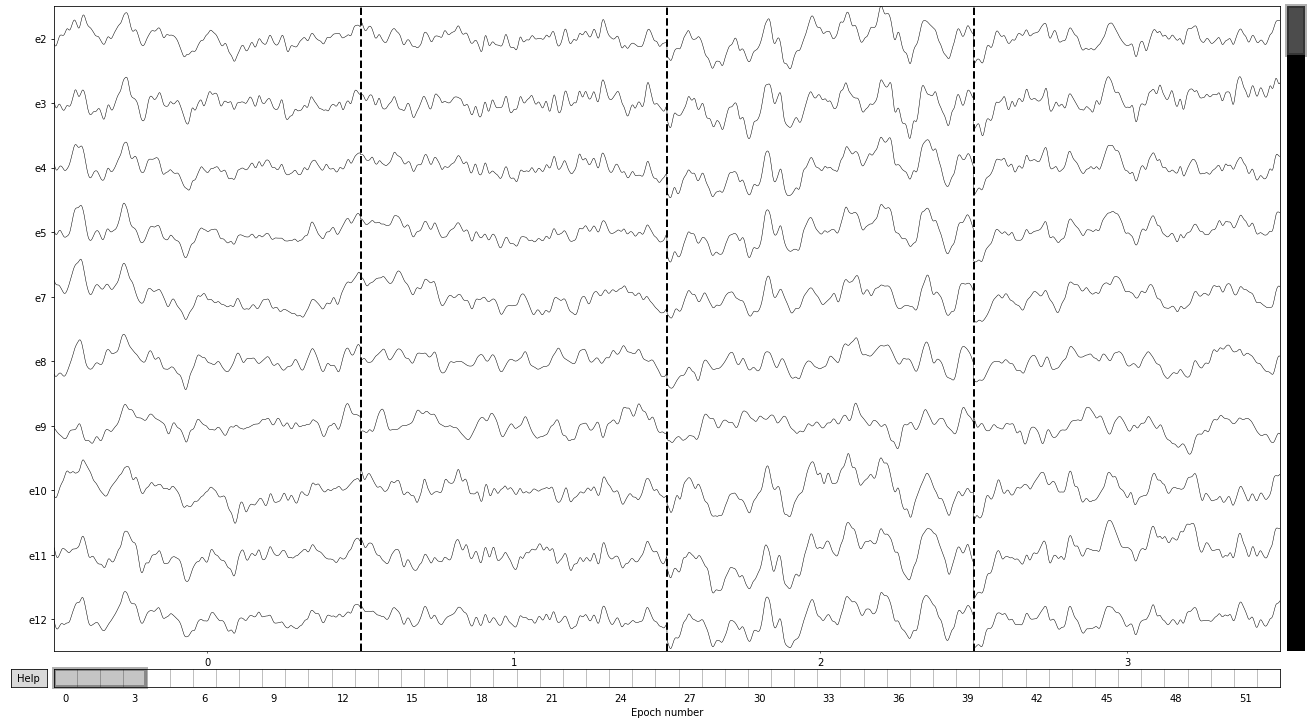

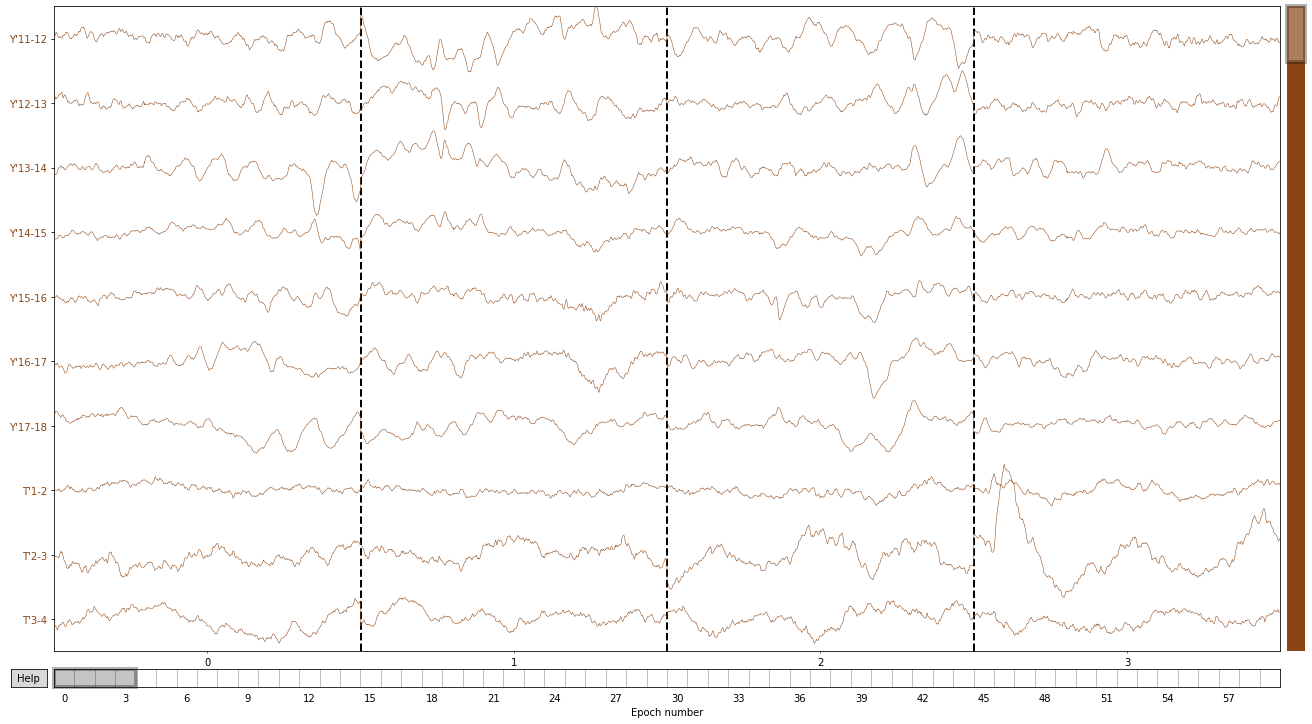

In [6]:
f = epo_eeg.plot(n_epochs=4, n_channels=10) # EEG data
f = epo_ieeg.plot(n_epochs=4, n_channels=10) # SEEG data

## Stimulation Information
Now we will get information about the stimulation parameters

In [7]:
stim_info = events.trial_type.unique()[0] # get the stimulating contacts' names
stim_ch = stim_info.split()[0]
stim_coords = seeg_ch_info.loc[seeg_ch_info['name']==stim_ch][['x', 'y', 'z']].values.squeeze() # find the coordinates of the stimulating channels
hemi = 'lh' if '\'' in stim_ch else 'rh'

print('Stimulation channels: %s (coordinates: %s)' % (stim_ch, np.round(stim_coords, 4).squeeze()))
print('Stimulation intensity: %s' % stim_info.split()[1])
print('Stimulation duration: %s' % stim_info.split()[2])
print('Stimulation frequency: %s' % stim_info.split()[3])
print('Stimulation angle: %s' % stim_info.split()[4])
print('Stimulation grey/white: %s' % stim_info.split()[5])

print('hemisphere: %s' % hemi)

Stimulation channels: Q'12-13 (coordinates: [-0.0398 -0.0094  0.0832])
Stimulation intensity: 5ma
Stimulation duration: 0.5ms
Stimulation frequency: 0.5hz
Stimulation angle: perpend
Stimulation grey/white: gr_wh
hemisphere: lh


## Cortico-Cortical Evoked Potentials
Finally, let's plot the Evoked responses

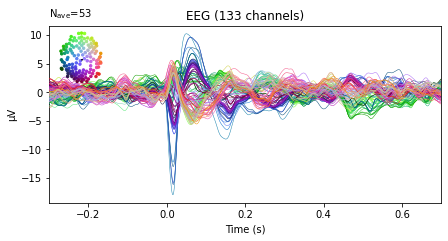

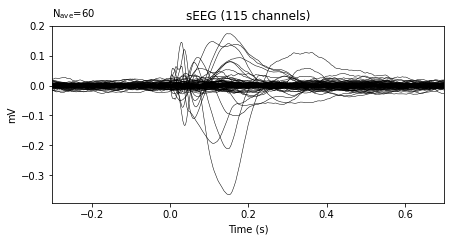

In [8]:
f = epo_eeg.average().plot(spatial_colors=True)
f = epo_ieeg.average().plot()